In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
import healpy as hp
from astropy.coordinates import SkyCoord
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [2]:
 # Importing the dataset containing optical clusters
df = pd.read_csv('ml_sample_real.csv', skiprows = 0, index_col=0)

# df['intensity100'] = np.loadtxt('../data/beam/real_planck_100.csv',delimiter=', ')
# df['intensity143'] = np.loadtxt('../data/beam/real_planck_143.csv',delimiter=', ')
# df['intensity217'] = np.loadtxt('../data/beam/real_planck_217.csv',delimiter=', ')
# df['intensity353'] = np.loadtxt('../data/beam/real_planck_353.csv',delimiter=', ')
# df['intensity545'] = np.loadtxt('../data/beam/real_planck_545.csv',delimiter=', ')
# df['intensity857'] = np.loadtxt('../data/beam/real_planck_857.csv',delimiter=', ')
# df['intensity090_act'] = np.loadtxt('../data/beam/real_act_090.csv',delimiter=', ')
# df['intensity150_act'] = np.loadtxt('../data/beam/real_act_150.csv',delimiter=', ')
# df['intensity220_act'] = np.loadtxt('../data/beam/real_act_220.csv',delimiter=', ')
# df['intensity_rosat'] = np.loadtxt('../data/beam/real_rosat.csv',delimiter=', ')

# df['intensity100'] = np.loadtxt('../data/beam2/real_planck_100.csv',delimiter=', ')
# df['intensity143'] = np.loadtxt('../data/beam2/real_planck_143.csv',delimiter=', ')
# df['intensity217'] = np.loadtxt('../data/beam2/real_planck_217.csv',delimiter=', ')
# df['intensity353'] = np.loadtxt('../data/beam2/real_planck_353.csv',delimiter=', ')
# df['intensity545'] = np.loadtxt('../data/beam2/real_planck_545.csv',delimiter=', ')
# df['intensity857'] = np.loadtxt('../data/beam2/real_planck_857.csv',delimiter=', ')
# df['intensity090_act'] = np.loadtxt('../data/beam2/real_act_090.csv',delimiter=', ')
# df['intensity150_act'] = np.loadtxt('../data/beam2/real_act_150.csv',delimiter=', ')
# df['intensity220_act'] = np.loadtxt('../data/beam2/real_act_220.csv',delimiter=', ')
# df['intensity_rosat'] = np.loadtxt('../data/beam2/real_rosat.csv',delimiter=', ')

# df['intensity100'] = np.loadtxt('../data/arcmin3/real_planck_100.csv',delimiter=', ')
# df['intensity143'] = np.loadtxt('../data/arcmin3/real_planck_143.csv',delimiter=', ')
# df['intensity217'] = np.loadtxt('../data/arcmin3/real_planck_217.csv',delimiter=', ')
# df['intensity353'] = np.loadtxt('../data/arcmin3/real_planck_353.csv',delimiter=', ')
# df['intensity545'] = np.loadtxt('../data/arcmin3/real_planck_545.csv',delimiter=', ')
# df['intensity857'] = np.loadtxt('../data/arcmin3/real_planck_857.csv',delimiter=', ')
# df['intensity090_act'] = np.loadtxt('../data/arcmin3/real_act_090.csv',delimiter=', ')
# df['intensity150_act'] = np.loadtxt('../data/arcmin3/real_act_150.csv',delimiter=', ')
# df['intensity220_act'] = np.loadtxt('../data/arcmin3/real_act_220.csv',delimiter=', ')
# df['intensity_rosat'] = np.loadtxt('../data/arcmin3/real_planck_rosat.csv',delimiter=', ')

df = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)]

In [3]:
# Importing the dataset containing non-clusters
df2 = pd.read_csv('voids_complete.csv', skiprows = 0, index_col=0)

# df2['intensity100'] = np.loadtxt('../data/beam/fake_planck_100.csv',delimiter=', ')
# df2['intensity143'] = np.loadtxt('../data/beam/fake_planck_143.csv',delimiter=', ')
# df2['intensity217'] = np.loadtxt('../data/beam/fake_planck_217.csv',delimiter=', ')
# df2['intensity353'] = np.loadtxt('../data/beam/fake_planck_353.csv',delimiter=', ')
# df2['intensity545'] = np.loadtxt('../data/beam/fake_planck_545.csv',delimiter=', ')
# df2['intensity857'] = np.loadtxt('../data/beam/fake_planck_857.csv',delimiter=', ')
# df2['intensity090_act'] = np.loadtxt('../data/beam/fake_act_090.csv',delimiter=', ')
# df2['intensity150_act'] = np.loadtxt('../data/beam/fake_act_150.csv',delimiter=', ')
# df2['intensity220_act'] = np.loadtxt('../data/beam/fake_act_220.csv',delimiter=', ')
# df2['intensity_rosat'] = np.loadtxt('../data/beam/fake_rosat.csv',delimiter=', ')

# df2['intensity100'] = np.loadtxt('../data/beam2/fake_planck_100.csv',delimiter=', ')
# df2['intensity143'] = np.loadtxt('../data/beam2/fake_planck_143.csv',delimiter=', ')
# df2['intensity217'] = np.loadtxt('../data/beam2/fake_planck_217.csv',delimiter=', ')
# df2['intensity353'] = np.loadtxt('../data/beam2/fake_planck_353.csv',delimiter=', ')
# df2['intensity545'] = np.loadtxt('../data/beam2/fake_planck_545.csv',delimiter=', ')
# df2['intensity857'] = np.loadtxt('../data/beam2/fake_planck_857.csv',delimiter=', ')
# df2['intensity090_act'] = np.loadtxt('../data/beam2/fake_act_090.csv',delimiter=', ')
# df2['intensity150_act'] = np.loadtxt('../data/beam2/fake_act_150.csv',delimiter=', ')
# df2['intensity220_act'] = np.loadtxt('../data/beam2/fake_act_220.csv',delimiter=', ')
# df2['intensity_rosat'] = np.loadtxt('../data/beam2/fake_rosat.csv',delimiter=', ')

# df2['intensity100'] = np.loadtxt('../data/arcmin3/fake_planck_100.csv',delimiter=', ')
# df2['intensity143'] = np.loadtxt('../data/arcmin3/fake_planck_143.csv',delimiter=', ')
# df2['intensity217'] = np.loadtxt('../data/arcmin3/fake_planck_217.csv',delimiter=', ')
# df2['intensity353'] = np.loadtxt('../data/arcmin3/fake_planck_353.csv',delimiter=', ')
# df2['intensity545'] = np.loadtxt('../data/arcmin3/fake_planck_545.csv',delimiter=', ')
# df2['intensity857'] = np.loadtxt('../data/arcmin3/fake_planck_857.csv',delimiter=', ')
# df2['intensity090_act'] = np.loadtxt('../data/arcmin3/fake_act_090.csv',delimiter=', ')
# df2['intensity150_act'] = np.loadtxt('../data/arcmin3/fake_act_150.csv',delimiter=', ')
# df2['intensity220_act'] = np.loadtxt('../data/arcmin3/fake_act_220.csv',delimiter=', ')
# df2['intensity_rosat'] = np.loadtxt('../data/arcmin3/fake_rosat.csv',delimiter=', ')

df2 = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)]

In [4]:
# i=10
# df2_scaled_up = df2.copy()
# df2_scaled_up['intensity090_act'] = df2['intensity090_act']*i
# df2_scaled_up['intensity100'] = df2['intensity100']*i
# df2_scaled_up['intensity143'] = df2['intensity143']*i
# df2_scaled_up['intensity150_act'] = df2['intensity150_act']*i
# df2_scaled_up['intensity217'] = df2['intensity217']*i
# df2_scaled_up['intensity220_act'] = df2['intensity220_act']*i
# df2_scaled_up['intensity353'] = df2['intensity353']*i
# df2_scaled_up['intensity545'] = df2['intensity545']*i
# df2_scaled_up['intensity857'] = df2['intensity857']*i
# df2_scaled_up['intensity_rosat'] = df2['intensity_rosat']*i
# df2_scaled_down = df2.copy()
# df2_scaled_down['intensity090_act'] = df2['intensity090_act']/i
# df2_scaled_down['intensity100'] = df2['intensity100']/i
# df2_scaled_down['intensity143'] = df2['intensity143']/i
# df2_scaled_down['intensity150_act'] = df2['intensity150_act']/i
# df2_scaled_down['intensity217'] = df2['intensity217']/i
# df2_scaled_down['intensity220_act'] = df2['intensity220_act']/i
# df2_scaled_down['intensity353'] = df2['intensity353']/i
# df2_scaled_down['intensity545'] = df2['intensity545']/i
# df2_scaled_down['intensity857'] = df2['intensity857']/i
# df2_scaled_down['intensity_rosat'] = df2['intensity_rosat']/i
# df2 = pd.concat([df2, df2_scaled_up, df2_scaled_down])
    
# # Importing the dataset containing non-clusters
# # df2 = df[:1228] * 0
# # df2['intensity100'] = np.loadtxt('../voids_signal100.csv',delimiter=', ')
# # df2['intensity143'] = np.loadtxt('../voids_signal143.csv',delimiter=', ')
# # df2['intensity353'] = np.loadtxt('../voids_signal.csv',delimiter=', ')
# # df2['amf_ra'] = np.loadtxt('../voids_ras.csv',delimiter=', ')
# # df2['amf_dec'] = np.loadtxt('../voids_decs.csv',delimiter=', ')
# # df2_scaled_up = df2.copy()
# # df2_scaled_up['intensity100'] = df2['intensity100']*2
# # df2_scaled_up['intensity143'] = df2['intensity143']*2
# # df2_scaled_up['intensity353'] = df2['intensity353']*2
# # df2_scaled_down = df2.copy()
# # df2_scaled_down['intensity100'] = df2['intensity100']/2
# # df2_scaled_down['intensity143'] = df2['intensity143']/2
# # df2_scaled_down['intensity353'] = df2['intensity353']/2
# # df2 = pd.concat([df2, df2_scaled_up, df2_scaled_down])

In [5]:
# Combine real and fake data
df3 = df.append(df2, ignore_index=True)

In [6]:
# plt.scatter(df3['glon'],df3['glat'],s=0.1,label='Fake')
# # plt.scatter(df['glon'],df['glat'],s=0.1,label='Real')
# plt.xlabel("Galactic longitude")
# plt.ylabel("Galactic latitude")
# plt.legend()

---

# Classification of clusters vs non clusters

In [7]:
# All
intensity_clusters = df[['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
intensity_voids = df2[['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
intensity_combined = df3[['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]

# Planck+ROSAT
# intensity_clusters = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
# intensity_voids = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
# intensity_combined = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]

# Planck+ACT
# intensity_clusters = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
# intensity_voids = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
# intensity_combined = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]

# Planck-only
# intensity_clusters = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
# intensity_voids = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
# intensity_combined = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]

# ACT only
# intensity_clusters = df[['intensity090_act','intensity150_act','intensity220_act']][::2]
# intensity_voids = df2[['intensity090_act','intensity150_act','intensity220_act']][::2]
# intensity_combined = df3[['intensity090_act','intensity150_act','intensity220_act']][::2]

# Planck low-freq
# intensity_clusters = df[['intensity100','intensity143','intensity217','intensity353']][::2]
# intensity_voids = df2[['intensity100','intensity143','intensity217','intensity353']][::2]
# intensity_combined = df3[['intensity100','intensity143','intensity217','intensity353']][::2]

cluster_tag = df3['cluster'][::2]

# Fit full sample with their associated classficiation
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(intensity_combined, cluster_tag)

# clf = SVC()
#clf = svm.SVR()
# clf.fit(intensity_combined, cluster_tag)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [8]:
# All
cluster = np.array([clf.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters[1::2].values]).flatten()

# Planck+ROSAT
# cluster = np.array([clf.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters[1::2].values]).flatten()

# Planck+ROSAT
# cluster = np.array([clf.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_clusters[1::2].values]).flatten()

# Planck-only
# cluster = np.array([clf.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters[1::2].values]).flatten()

# ACT-only
# cluster = np.array([clf.predict([[i090, i150, i220]]) for i090, i150, i220 in intensity_clusters[1::2].values]).flatten()

# Low-freq Planck
# cluster = np.array([clf.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_clusters[1::2].values]).flatten()

In [9]:
# All
no_cluster= np.array([clf.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_voids[1::2].values]).flatten()

# Planck+ROSAT
# no_cluster = np.array([clf.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_voids[1::2].values]).flatten()

# Planck+ACT
# no_cluster = np.array([clf.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_voids[1::2].values]).flatten()

# Planck-only
# no_cluster= np.array([clf.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_voids[1::2].values]).flatten()

# ACT-only
# no_cluster= np.array([clf.predict([[i090, i150, i220]]) for i090, i150, i220 in intensity_voids[1::2].values]).flatten()

# # Low-freq Planck
# no_cluster= np.array([clf.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_voids[1::2].values]).flatten()

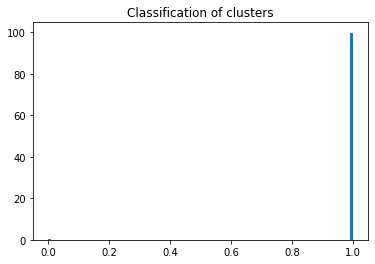

In [10]:
plt.hist(cluster,bins=100,range=(0,1),density=True)
plt.title("Classification of clusters")
plt.show()

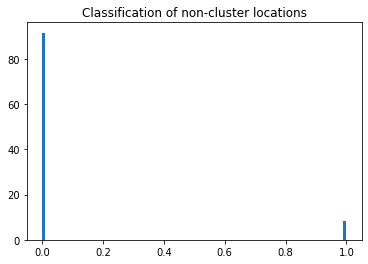

In [11]:
plt.hist(no_cluster,bins=100,range=(0,1),density=True)
plt.title("Classification of non-cluster locations")
plt.show()

---

# Identification of clusters

In [12]:
# fsky = pd.read_csv('full_sky.csv', skiprows = 0, index_col=0)

In [13]:
# # fsky['intensity100'] = np.loadtxt('../data/arcmin3/fsky_planck_100.csv',delimiter=', ')
# # fsky['intensity143'] = np.loadtxt('../data/arcmin3/fsky_planck_143.csv',delimiter=', ')
# # fsky['intensity217'] = np.loadtxt('../data/arcmin3/fsky_planck_217.csv',delimiter=', ')
# # fsky['intensity353'] = np.loadtxt('../data/arcmin3/fsky_planck_353.csv',delimiter=', ')
# # fsky['intensity545'] = np.loadtxt('../data/arcmin3/fsky_planck_545.csv',delimiter=', ')
# # fsky['intensity857'] = np.loadtxt('../data/arcmin3/fsky_planck_857.csv',delimiter=', ')
# # fsky['intensity090_act'] = np.loadtxt('../data/arcmin3/fsky_act_090.csv',delimiter=', ')
# # fsky['intensity150_act'] = np.loadtxt('../data/arcmin3/fsky_act_150.csv',delimiter=', ')
# # fsky['intensity220_act'] = np.loadtxt('../data/arcmin3/fsky_act_220.csv',delimiter=', ')
# # fsky['intensity_rosat'] = np.loadtxt('../data/arcmin3/fsky_rosat.csv',delimiter=', ')

# fsky['intensity100'] = np.loadtxt('../data/fsky_planck_100.csv',delimiter=', ')
# fsky['intensity143'] = np.loadtxt('../data/fsky_planck_143.csv',delimiter=', ')
# fsky['intensity217'] = np.loadtxt('../data/fsky_planck_217.csv',delimiter=', ')
# fsky['intensity353'] = np.loadtxt('../data/fsky_planck_353.csv',delimiter=', ')
# fsky['intensity545'] = np.loadtxt('../data/fsky_planck_545.csv',delimiter=', ')
# fsky['intensity857'] = np.loadtxt('../data/fsky_planck_857.csv',delimiter=', ')
# fsky['intensity090_act'] = np.loadtxt('../data/fsky_act_090.csv',delimiter=', ')
# fsky['intensity150_act'] = np.loadtxt('../data/fsky_act_150.csv',delimiter=', ')
# fsky['intensity220_act'] = np.loadtxt('../data/fsky_act_220.csv',delimiter=', ')
# fsky['intensity_rosat'] = np.loadtxt('../data/fsky_rosat.csv',delimiter=', ')

In [14]:
# fsky = fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]

In [15]:
links100 = ['../data/results100_1.csv','../data/results100_2.csv','../data/results100_3.csv',
         '../data/results100_4.csv','../data/results100_5.csv','../data/results100_6.csv',
         '../data/results100_7.csv','../data/results100_8.csv','../data/results100_9.csv',
         '../data/results100_10.csv']
links143 = ['../data/results143_1.csv','../data/results143_2.csv','../data/results143_3.csv',
         '../data/results143_4.csv','../data/results143_5.csv','../data/results143_6.csv',
         '../data/results143_7.csv','../data/results143_8.csv','../data/results143_9.csv',
         '../data/results143_10.csv']
links353 = ['../data/results353_1.csv','../data/results353_2.csv','../data/results353_3.csv',
         '../data/results353_4.csv','../data/results353_5.csv','../data/results353_6.csv',
         '../data/results353_7.csv','../data/results353_8.csv','../data/results353_9.csv',
         '../data/results353_10.csv']
links545 = ['../data/results545_1.csv','../data/results545_2.csv','../data/results545_3.csv',
         '../data/results545_4.csv','../data/results545_5.csv','../data/results545_6.csv',
         '../data/results545_7.csv','../data/results545_8.csv','../data/results545_9.csv',
         '../data/results545_10.csv']
links857 = ['../data/results857_1.csv','../data/results857_2.csv','../data/results857_3.csv',
         '../data/results857_4.csv','../data/results857_5.csv','../data/results857_6.csv',
         '../data/results857_7.csv','../data/results857_8.csv','../data/results857_9.csv',
         '../data/results857_10.csv']

linksrosat = ['../voids_y_rosat_full_sky.csv']
links090 = ['../voids_y_act90_full_sky.csv']
links150 = ['../voids_y_150_full_sky.csv']
links220 = ['../voids_y_220_full_sky.csv']
links217 = ['voids_y_217_full_sky.csv']

data090 = pd.DataFrame()
data100 = pd.DataFrame()
data143 = pd.DataFrame()
data150 = pd.DataFrame()
data217 = pd.DataFrame()
data220 = pd.DataFrame()
data353 = pd.DataFrame()
data545 = pd.DataFrame()
data857 = pd.DataFrame()
datarosat = pd.DataFrame()

for links in [links090,links100,links143,links150,links217,links220,links353,links545,links857,linksrosat]:
    if links==links090:
        for link in links:
            data090 = pd.concat([data090,pd.DataFrame(np.loadtxt(link,delimiter=', '))])    
    if links==links100:
        for link in links:
            data100 = pd.concat([data100,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links143:
        for link in links:
            data143 = pd.concat([data143,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links150:
        for link in links:
            data150 = pd.concat([data150,pd.DataFrame(np.loadtxt(link,delimiter=', '))])
    if links==links217:
        for link in links:
            data217 = pd.concat([data217,pd.DataFrame(np.loadtxt(link,delimiter=', '))])
    if links==links220:
        for link in links:
            data220 = pd.concat([data220,pd.DataFrame(np.loadtxt(link,delimiter=', '))])            
    if links==links353:
        for link in links:
            data353 = pd.concat([data353,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links545:
        for link in links:
            data545 = pd.concat([data545,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links857:
        for link in links:
            data857 = pd.concat([data857,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])            
    if links==linksrosat:
        for link in links:
            datarosat = pd.concat([datarosat,pd.DataFrame(np.loadtxt(link,delimiter=', '))])

# Convert the RA and DEC to galactic coordinates
c = SkyCoord(data100[1],data100[2],frame='icrs',unit='deg')
data100['glat'] = c.galactic.b.degree
data100['glon'] = c.galactic.l.degree

# initialize data of lists.
data_all = {'glat':data100['glat'].values,
            'glon':data100['glon'].values,
            'int090':data090[0].values,
            'int100':data100[0].values,
            'int143':data143[0].values,
            'int150':data150[0].values,
            'int217':data217[0].values,
            'int220':data220[0].values,
            'int353':data353[0].values,
            'int545':data545[0].values,
            'int857':data857[0].values,
            'introsat':datarosat[0].values}
 
fsky = pd.DataFrame(data_all)

In [16]:
fsky

,glat,glon,int090,int100,int143,int150,int217,int220,int353,int545,int857,introsat
0,-27.128252,302.931925,-9999.0,-0.000073,-0.000048,-9999.0,0.000185,-9999.0,0.002265,2.287474,6.347861,0.000093
1,-27.128252,302.931925,-9999.0,-0.000074,-0.000048,-9999.0,0.000185,-9999.0,0.002269,2.286885,6.347425,0.000097
2,-27.128252,302.931925,-9999.0,-0.000074,-0.000047,-9999.0,0.000186,-9999.0,0.002272,2.286257,6.346549,0.000106
3,-27.128252,302.931925,-9999.0,-0.000075,-0.000047,-9999.0,0.000186,-9999.0,0.002274,2.285667,6.345428,0.000121
4,-27.128252,302.931925,-9999.0,-0.000076,-0.000047,-9999.0,0.000187,-9999.0,0.002275,2.285188,6.344205,0.000140
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,27.128252,122.931925,-9999.0,0.000031,0.000087,-9999.0,0.000344,-9999.0,0.002582,2.476438,6.841576,0.000161
59996,27.128252,122.931925,-9999.0,0.000032,0.000087,-9999.0,0.000345,-9999.0,0.002583,2.476450,6.841960,0.000153
59997,27.128252,122.931925,-9999.0,0.000032,0.000087,-9999.0,0.000344,-9999.0,0.002583,2.476401,6.842011,0.000147
59998,27.128252,122.931925,-9999.0,0.000031,0.000087,-9999.0,0.000344,-9999.0,0.002583,2.476242,6.841590,0.000142


In [17]:
# All
cluster_prob= np.array([clf.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'int090', 'int150', 'int220', 'introsat']].values]).flatten()

# Planck+ROSAT
# cluster_prob= np.array([clf.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'introsat']].values]).flatten()

# Planck+ACT
# cluster_prob= np.array([clf.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i150]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'int090', 'int150', 'int220']].values]).flatten()

# Planck-only
# cluster_prob= np.array([clf.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in fsky[['int100','int143','int217','int353', 'int545', 'int857']].values]).flatten()

# # ACT-only
# cluster_prob= np.array([clf.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in fsky[1::2].values]).flatten()

# Low-freq Planck
# cluster_prob= np.array([clf.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in fsky[['int100','int143','int217','int353']].values]).flatten()

In [18]:
fsky['cluster']=cluster_prob

In [19]:
pl143 = hp.read_map('../data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits')

/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/projaxes.py:209: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds


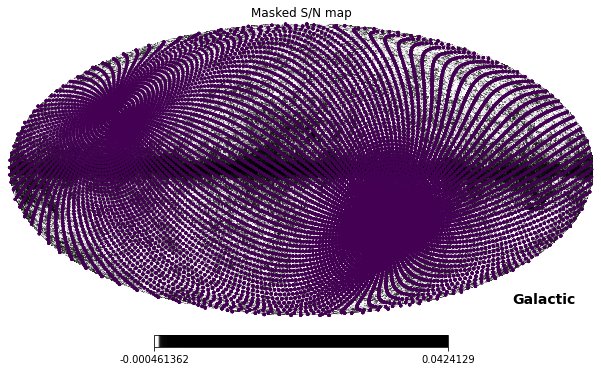

In [20]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(df['glon'],df['glat'],c='red',lonlat=True,s=0.01)
# hp.visufunc.projscatter(df2['glon'],df2['glat'],c='blue',lonlat=True,s=0.01)
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],lonlat=True,c=fsky.cluster,s=5)
# hp.visufunc.projscatter(fsky[fsky.cluster<0.5]['glon'],fsky[fsky.cluster<0.5]['glat'],lonlat=True,c="darkblue",s=5)
# hp.visufunc.projscatter(fsky[fsky.cluster>0.5]['glon'],fsky[fsky.cluster>0.5]['glat'],lonlat=True,c="magenta",s=5)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,cmap='RdBu',s=1)
# plt.scatter(df['glon'],df['glat'],c='r',s=1)

In [21]:
fsky['cluster']

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: cluster, Length: 60000, dtype: int64